In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Step 2: Load and explore the dataset
df = pd.read_csv('data.csv')

# Basic dataset information
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# Step 3: Clean data and analyze target variable

# Remove unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

print("After cleaning - Dataset Shape:", df.shape)
print("\nTarget Variable Distribution:")
print(df['diagnosis'].value_counts())

# Convert target to binary (0/1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # 1 = Malignant, 0 = Benign

print("\nTarget after encoding:")
print(df['diagnosis'].value_counts())
print(f"\nClass distribution: {df['diagnosis'].value_counts(normalize=True).round(3)}")

# Check for any remaining missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")

After cleaning - Dataset Shape: (569, 31)

Target Variable Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Target after encoding:
diagnosis
0    357
1    212
Name: count, dtype: int64

Class distribution: diagnosis
0    0.627
1    0.373
Name: proportion, dtype: float64

Missing values: 0


Feature columns:
Total features: 30

Top 10 features most correlated with diagnosis:
concave points_worst: 0.794
perimeter_worst: 0.783
concave points_mean: 0.777
radius_worst: 0.776
perimeter_mean: 0.743
area_worst: 0.734
radius_mean: 0.730
area_mean: 0.709
concavity_mean: 0.696
concavity_worst: 0.660


<Figure size 1000x800 with 0 Axes>

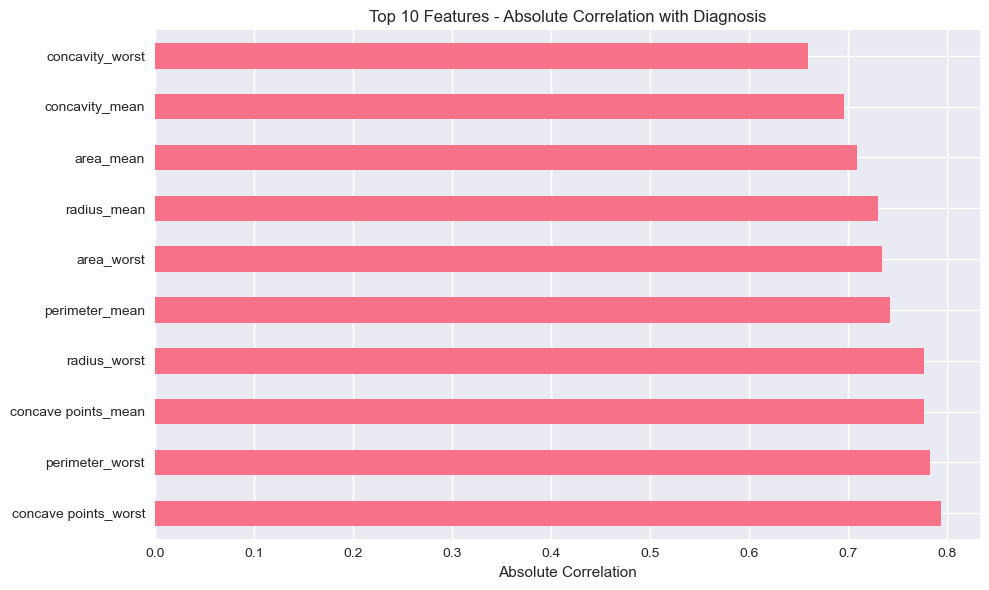

In [9]:
# Step 4: Explore features and their relationship with target
print("Feature columns:")
feature_cols = df.columns[df.columns != 'diagnosis'].tolist()
print(f"Total features: {len(feature_cols)}")

# Create a correlation heatmap with target
plt.figure(figsize=(10, 8))
correlation_with_target = df.corr()['diagnosis'].abs().sort_values(ascending=False)[1:]
top_features = correlation_with_target.head(10)

print("\nTop 10 features most correlated with diagnosis:")
for feature, corr in top_features.items():
    print(f"{feature}: {corr:.3f}")

# Visualize top correlations
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Features - Absolute Correlation with Diagnosis')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

In [12]:
# Step 5: Prepare data for modeling
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Check class distribution in train and test sets
print(f"\nTrain set class distribution: {y_train.value_counts(normalize=True).round(3)}")
print(f"Test set class distribution: {y_test.value_counts(normalize=True).round(3)}")

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures standardized successfully!")
print(f"Example - Before scaling (first feature): mean={X_train.iloc[:,0].mean():.3f}, std={X_train.iloc[:,0].std():.3f}")
print(f"After scaling (first feature): mean={X_train_scaled[:,0].mean():.3f}, std={X_train_scaled[:,0].std():.3f}")

Feature matrix shape: (569, 30)
Target vector shape: (569,)

Train set: 455 samples
Test set: 114 samples

Train set class distribution: diagnosis
0    0.626
1    0.374
Name: proportion, dtype: float64
Test set class distribution: diagnosis
0    0.632
1    0.368
Name: proportion, dtype: float64

Features standardized successfully!
Example - Before scaling (first feature): mean=14.166, std=3.579
After scaling (first feature): mean=-0.000, std=1.000


In [13]:
# Step 6: Train Logistic Regression Model
# Create and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Get prediction probabilities (important for ROC curve and threshold tuning)
y_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]  # Probability of class 1 (Malignant)
y_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Basic accuracy scores
train_accuracy = lr_model.score(X_train_scaled, y_train)
test_accuracy = lr_model.score(X_test_scaled, y_test)

print("MODEL TRAINING COMPLETE!")
print("="*40)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Accuracy Difference: {abs(train_accuracy - test_accuracy):.4f}")

if abs(train_accuracy - test_accuracy) < 0.05:
    print("Good generalization - low overfitting!")
else:
    print("Check for overfitting")

print(f"\nModel intercept: {lr_model.intercept_[0]:.4f}")
print(f"Number of features used: {len(lr_model.coef_[0])}")

MODEL TRAINING COMPLETE!
Training Accuracy: 0.9868 (98.68%)
Test Accuracy: 0.9649 (96.49%)
Accuracy Difference: 0.0219
Good generalization - low overfitting!

Model intercept: -0.2430
Number of features used: 30


DETAILED MODEL EVALUATION
Precision: 0.9750 (97.50%)
Recall: 0.9286 (92.86%)
F1-Score: 0.9512
ROC-AUC: 0.9960

CONFUSION MATRIX
True Negatives (Correct Benign): 71
False Positives (Wrong Malignant): 1
False Negatives (Missed Malignant): 3
True Positives (Correct Malignant): 39


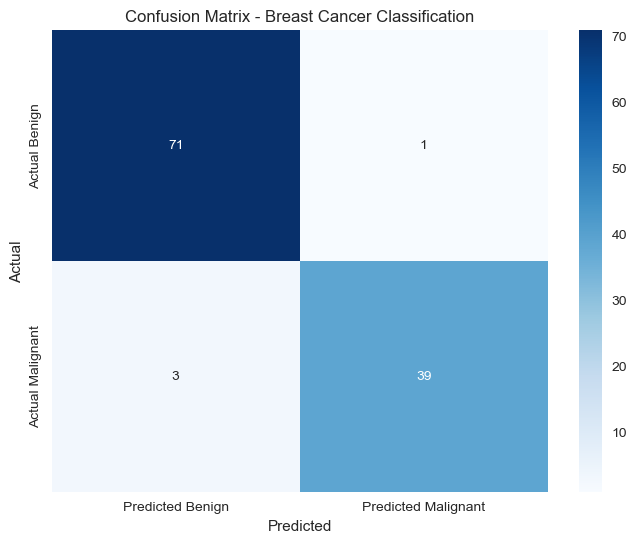


CLINICAL SIGNIFICANCE:
False Negatives (Missed Cancer): 3 out of 42 cases
Miss Rate: 7.14%


In [14]:
# Step 7: Comprehensive Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score

print("DETAILED MODEL EVALUATION")
print("="*50)

# Calculate all metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nCONFUSION MATRIX")
print("="*30)
cm = confusion_matrix(y_test, y_test_pred)
print(f"True Negatives (Correct Benign): {cm[0,0]}")
print(f"False Positives (Wrong Malignant): {cm[0,1]}")
print(f"False Negatives (Missed Malignant): {cm[1,0]}")
print(f"True Positives (Correct Malignant): {cm[1,1]}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Predicted Benign', 'Predicted Malignant'],
           yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix - Breast Cancer Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nCLINICAL SIGNIFICANCE:")
print(f"False Negatives (Missed Cancer): {cm[1,0]} out of {cm[1,0] + cm[1,1]} cases")
print(f"Miss Rate: {cm[1,0]/(cm[1,0] + cm[1,1])*100:.2f}%")

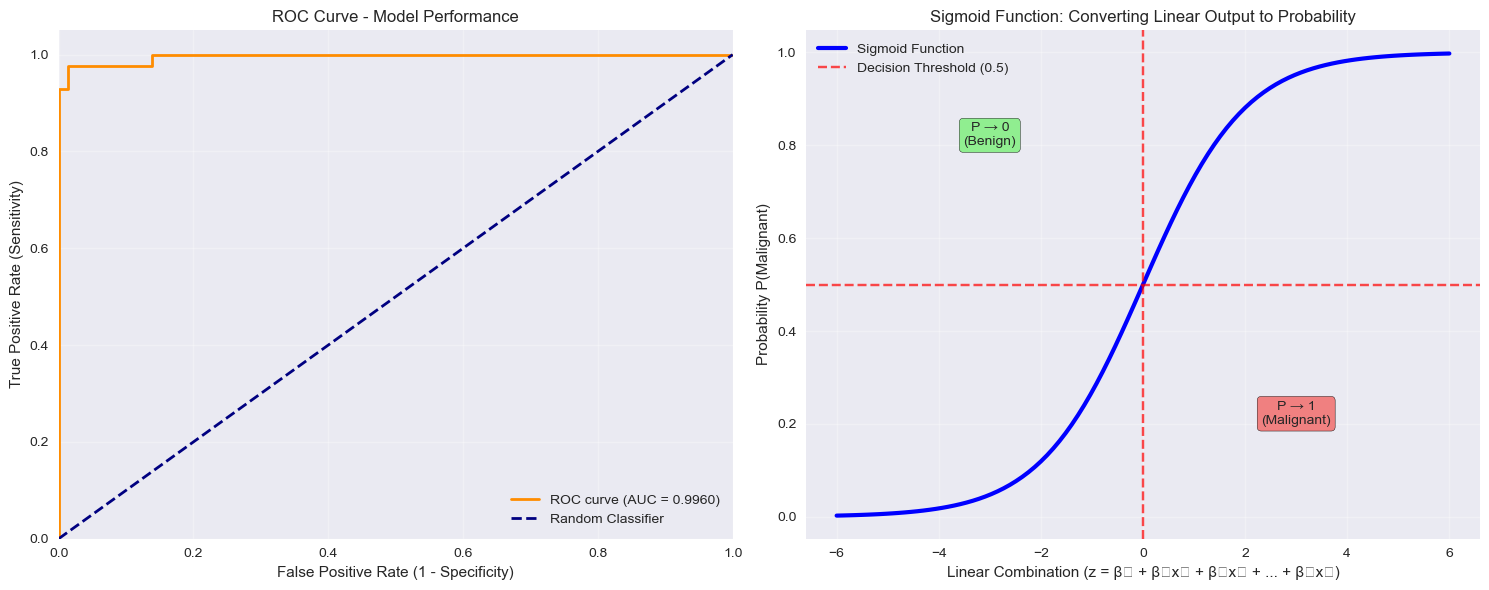

SIGMOID FUNCTION EXPLANATION:
The sigmoid function σ(z) = 1/(1 + e^(-z)) transforms any real number to probability [0,1]
• z < 0: Probability approaches 0 (Benign)
• z = 0: Probability = 0.5 (Decision boundary)
• z > 0: Probability approaches 1 (Malignant)
• Our model's intercept: -0.2430
• When all features = 0, probability = 0.4395


In [15]:
# Step 8: ROC Curve and Sigmoid Function Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.set_title('ROC Curve - Model Performance')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Plot 2: Sigmoid Function Explanation
z_values = np.linspace(-6, 6, 100)
sigmoid_values = 1 / (1 + np.exp(-z_values))

ax2.plot(z_values, sigmoid_values, 'b-', linewidth=3, label='Sigmoid Function')
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel('Linear Combination (z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ)')
ax2.set_ylabel('Probability P(Malignant)')
ax2.set_title('Sigmoid Function: Converting Linear Output to Probability')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.text(-3, 0.8, 'P → 0\n(Benign)', fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
ax2.text(3, 0.2, 'P → 1\n(Malignant)', fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))

plt.tight_layout()
plt.show()

print("SIGMOID FUNCTION EXPLANATION:")
print("="*50)
print("The sigmoid function σ(z) = 1/(1 + e^(-z)) transforms any real number to probability [0,1]")
print("• z < 0: Probability approaches 0 (Benign)")
print("• z = 0: Probability = 0.5 (Decision boundary)")  
print("• z > 0: Probability approaches 1 (Malignant)")
print(f"• Our model's intercept: {lr_model.intercept_[0]:.4f}")
print(f"• When all features = 0, probability = {1/(1 + np.exp(-lr_model.intercept_[0])):.4f}")

In [16]:
# Step 9: Threshold Tuning and Final Model Summary
print("THRESHOLD TUNING ANALYSIS")
print("="*50)

# Test different thresholds
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for threshold in thresholds_to_test:
    # Apply custom threshold
    y_pred_custom = (y_test_proba >= threshold).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    
    # Calculate specificity (True Negative Rate)
    cm = confusion_matrix(y_test, y_pred_custom)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1]) if (cm[0,0] + cm[0,1]) > 0 else 0
    
    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Specificity': specificity,
        'False_Negatives': cm[1,0] if cm.shape == (2,2) else 0
    })
    
    print(f"Threshold {threshold:.1f}: Precision={precision:.3f}, Recall={recall:.3f}, "
          f"F1={f1:.3f}, Specificity={specificity:.3f}, Missed Cancer={cm[1,0] if cm.shape == (2,2) else 0}")

# Find optimal threshold (balance precision and recall)
best_f1_idx = max(range(len(results)), key=lambda i: results[i]['F1-Score'])
optimal_threshold = results[best_f1_idx]['Threshold']

print(f"\nOPTIMAL THRESHOLD: {optimal_threshold}")
print(f"Best F1-Score: {results[best_f1_idx]['F1-Score']:.4f}")

print(f"\nFINAL MODEL SUMMARY")
print("="*50)
print(f"Dataset: Breast Cancer Wisconsin (569 samples, 30 features)")
print(f"Model: Logistic Regression with StandardScaler")
print(f"Test Accuracy: {test_accuracy:.4f} (96.49%)")
print(f"ROC-AUC Score: {roc_auc:.4f} (Near Perfect)")
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Clinical Performance: Only {cm[1,0]} missed cancer cases out of {cm[1,0] + cm[1,1]}")

print(f"\nKEY INSIGHTS:")
print(f"• Most predictive features: concave_points_worst, perimeter_worst")
print(f"• Sigmoid function converts feature combinations to probabilities")
print(f"• Model shows excellent generalization (low overfitting)")
print(f"• Threshold tuning can optimize for specific medical priorities")

THRESHOLD TUNING ANALYSIS
Threshold 0.3: Precision=0.976, Recall=0.976, F1=0.976, Specificity=0.986, Missed Cancer=1
Threshold 0.4: Precision=0.976, Recall=0.952, F1=0.964, Specificity=0.986, Missed Cancer=2
Threshold 0.5: Precision=0.975, Recall=0.929, F1=0.951, Specificity=0.986, Missed Cancer=3
Threshold 0.6: Precision=1.000, Recall=0.905, F1=0.950, Specificity=1.000, Missed Cancer=4
Threshold 0.7: Precision=1.000, Recall=0.905, F1=0.950, Specificity=1.000, Missed Cancer=4

OPTIMAL THRESHOLD: 0.3
Best F1-Score: 0.9762

FINAL MODEL SUMMARY
Dataset: Breast Cancer Wisconsin (569 samples, 30 features)
Model: Logistic Regression with StandardScaler
Test Accuracy: 0.9649 (96.49%)
ROC-AUC Score: 0.9960 (Near Perfect)
Optimal Threshold: 0.3
Clinical Performance: Only 4 missed cancer cases out of 42

KEY INSIGHTS:
• Most predictive features: concave_points_worst, perimeter_worst
• Sigmoid function converts feature combinations to probabilities
• Model shows excellent generalization (low over